<a href="https://colab.research.google.com/github/Gakarau/Book-Reccomendation-System/blob/main/Copy_of_Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **BOOK RECCOMMENDATION SYSTEM**

Books, like movies, are at times entertaining when shared and reviewed together. For this reason, people join bookclubs, reccommend good reads for each other, and share the experiences with each other. Avid readers who enjoy certain books but are unable to find clubs where they can share books and related suggestions may require a support system that can reccommend books based on their interests. The proposed data-driven system reccommends books for people based popular Amazon buys, helping them identify decent books to buy together. 

The dataset: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset?resource=download


***Exploratory Data Analysis***

In [ ]:
pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install autoviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing libraries 
import pandas as pd 
from autoviz.AutoViz_Class import AutoViz_Class
import numpy as np 
import sweetviz as sv

In [ ]:
#Loading the dataset 
Books = pd.read_csv('/content/Books.csv')
Ratings = pd.read_csv('/content/Ratings.csv')
Users = pd.read_csv('/content/Users.csv')


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_Report_Ratings.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



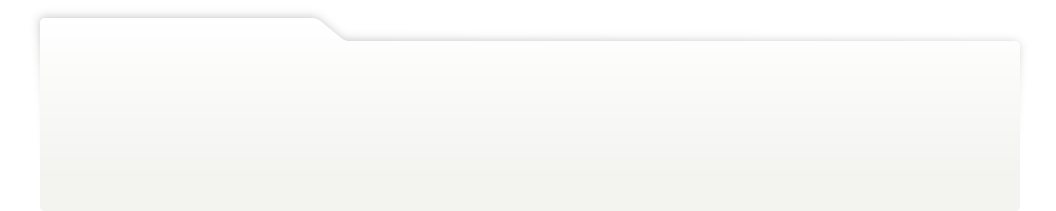
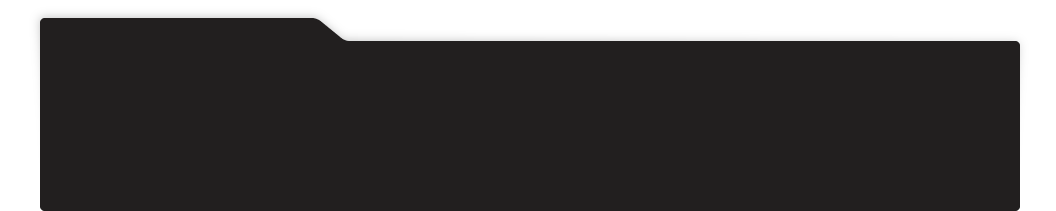
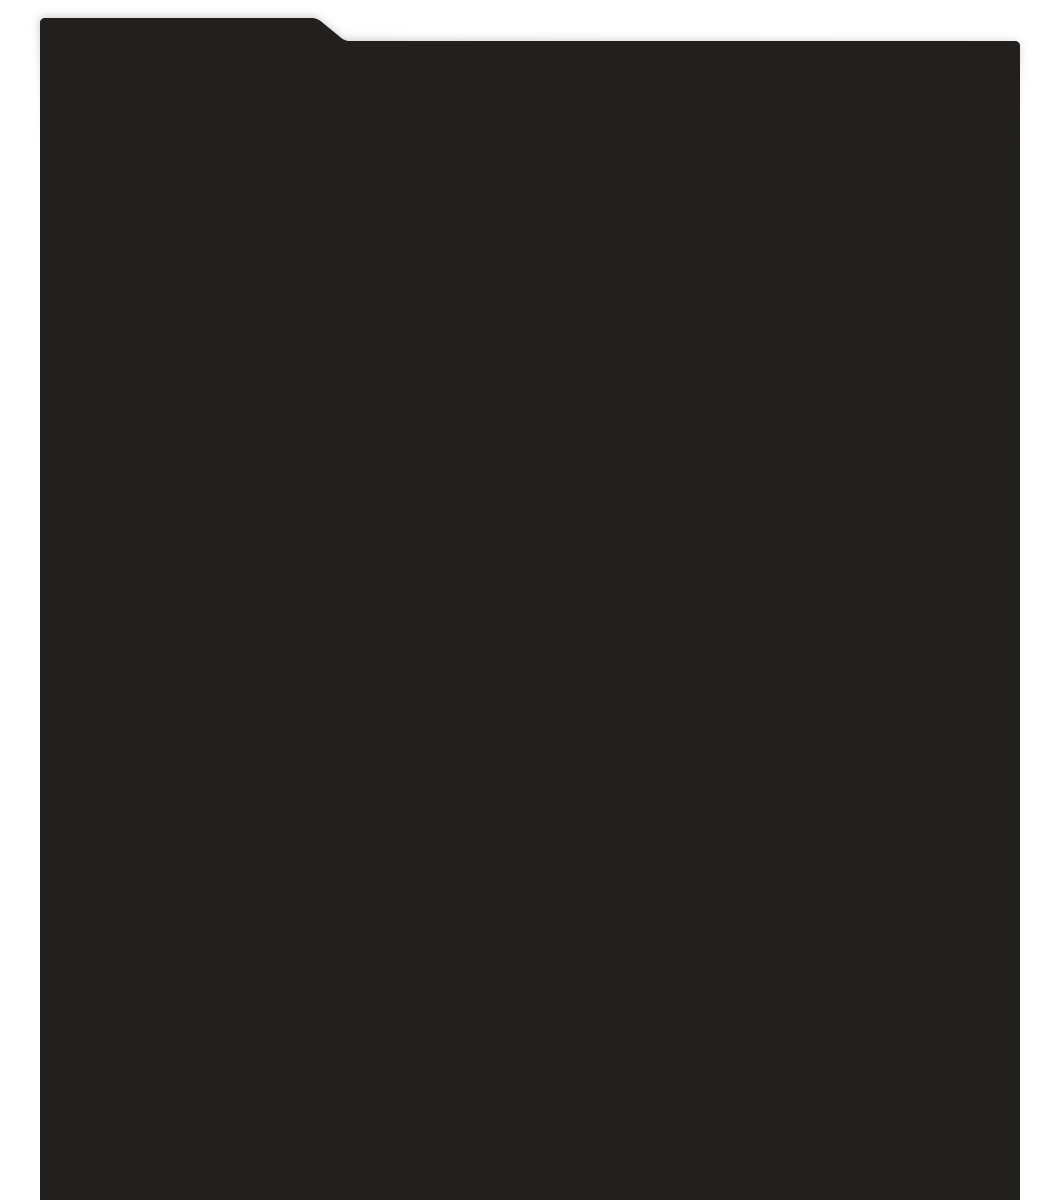
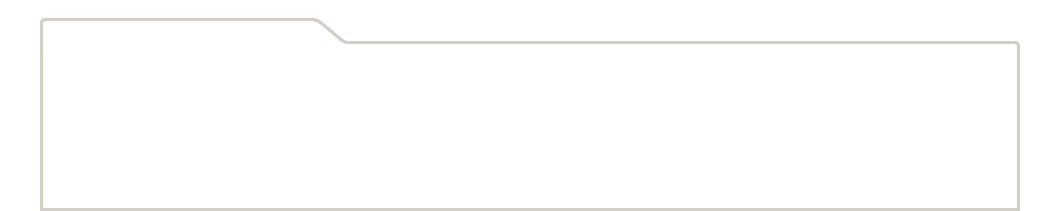
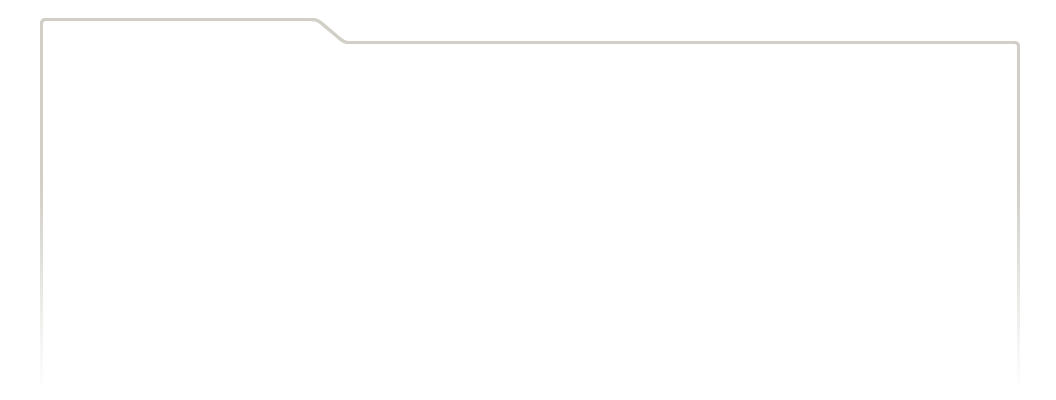
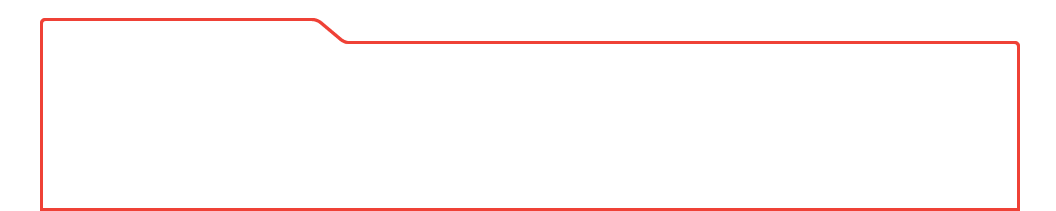
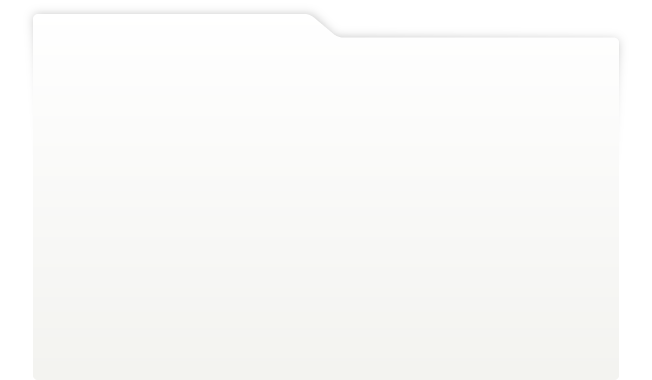
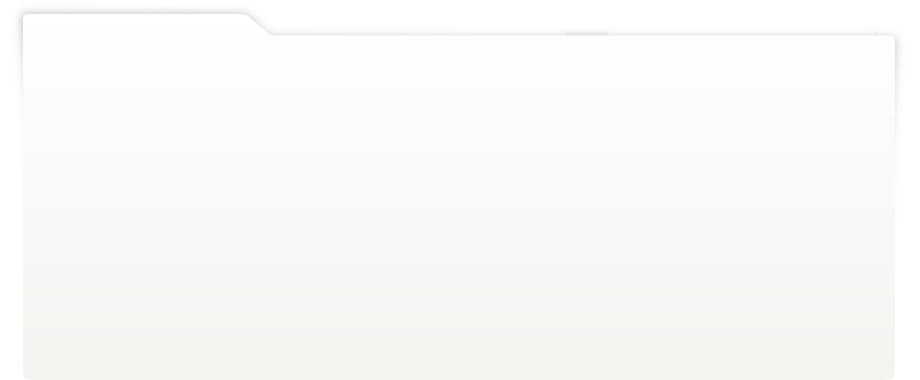
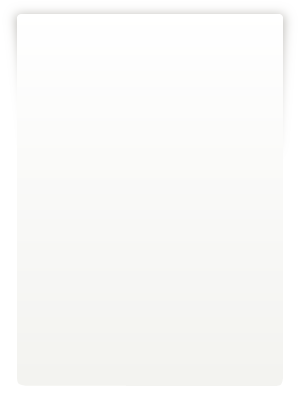
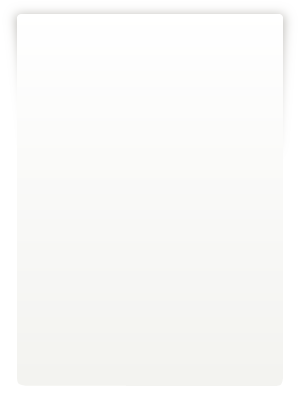
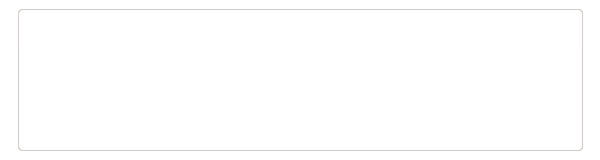
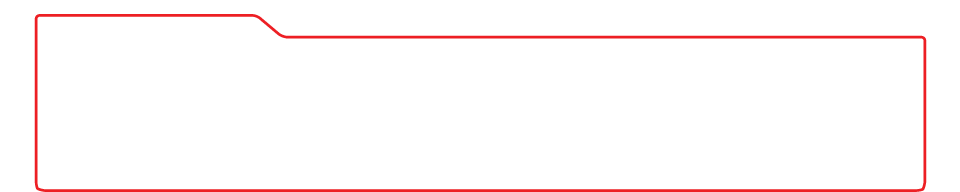
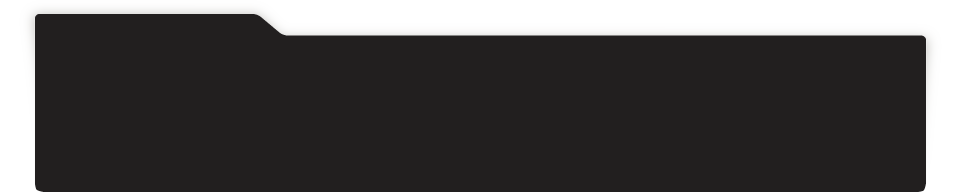
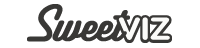
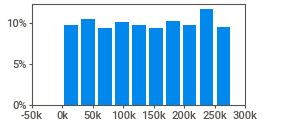
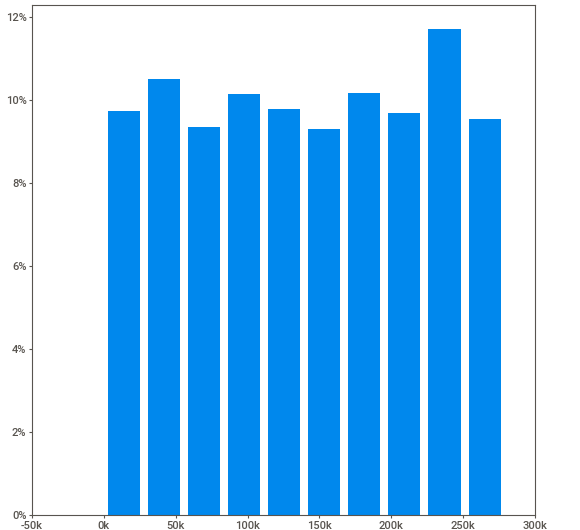
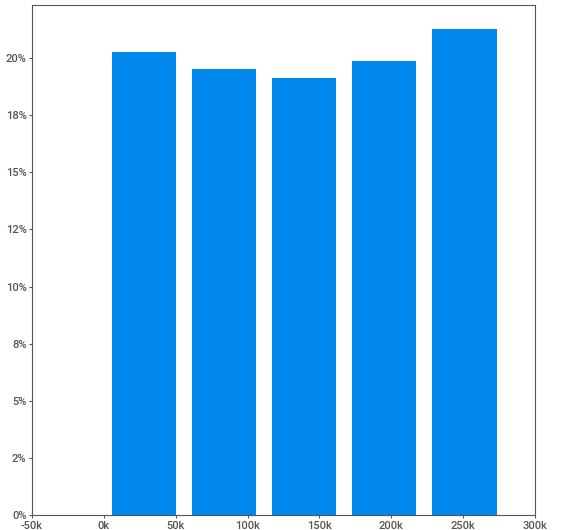
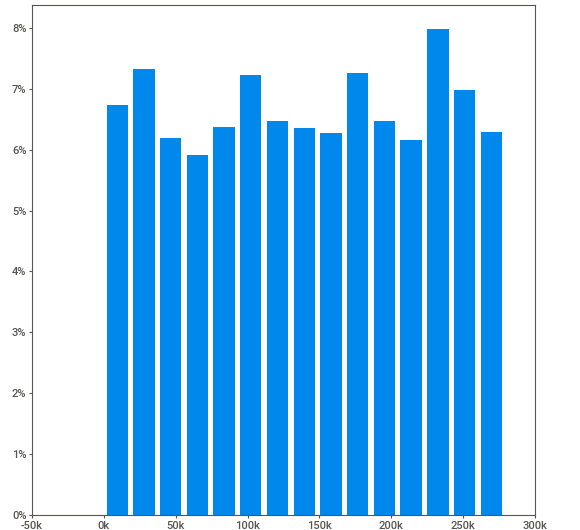
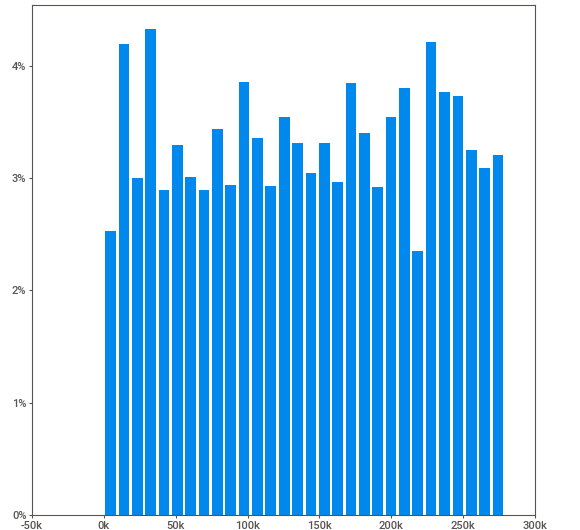
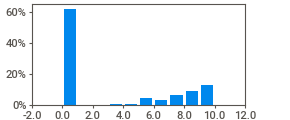
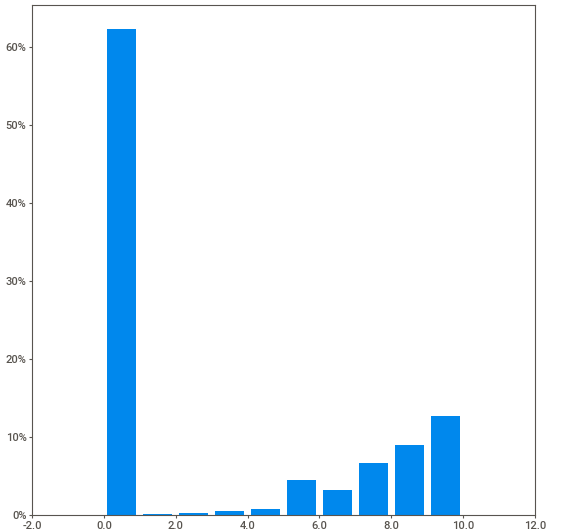
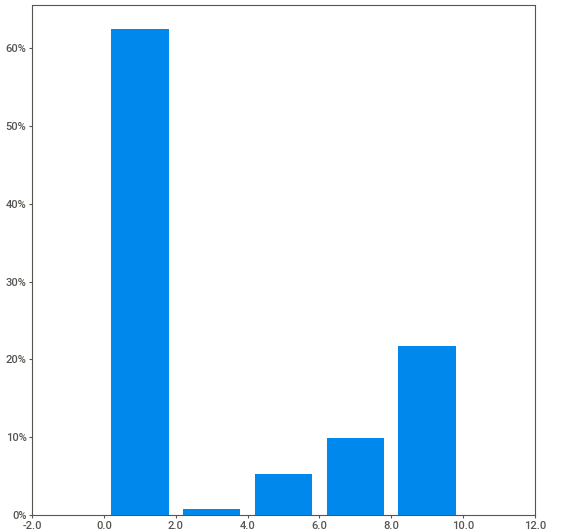
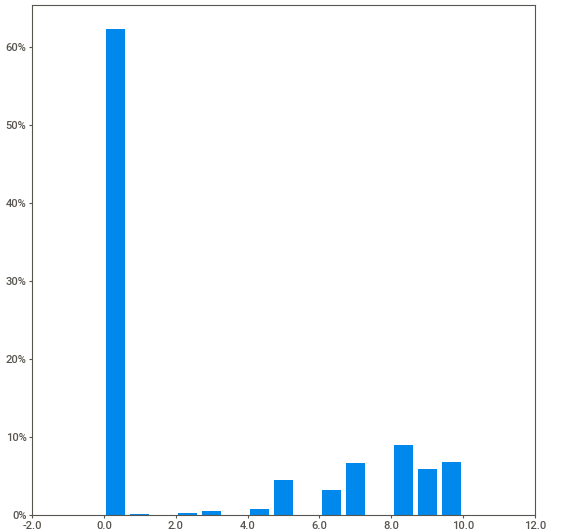
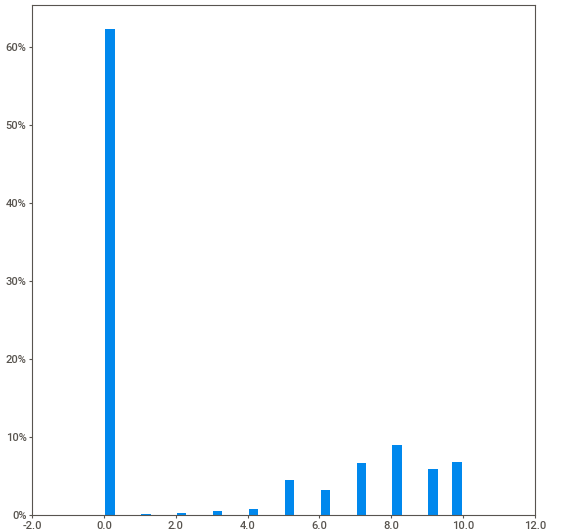
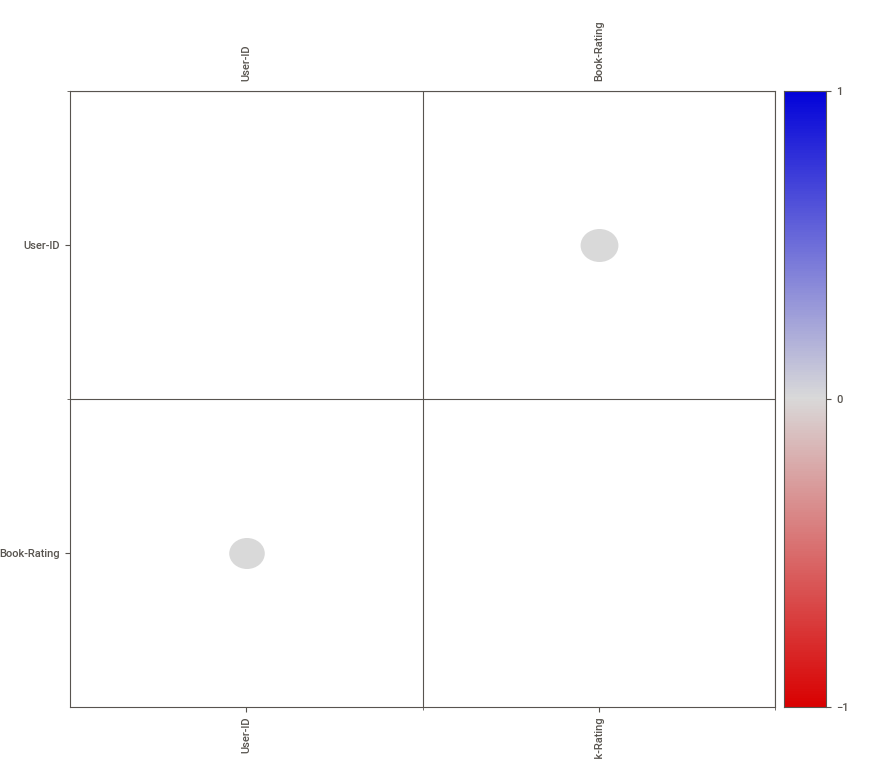
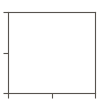

In [ ]:
#EDA Ratings Dataset 
EDA_Report_Ratings = sv.analyze(Ratings)
EDA_Report_Ratings.show_html('EDA_Report_Ratings.html')
#showcasing the report 
EDA_Report_Ratings.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_Report_Users.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



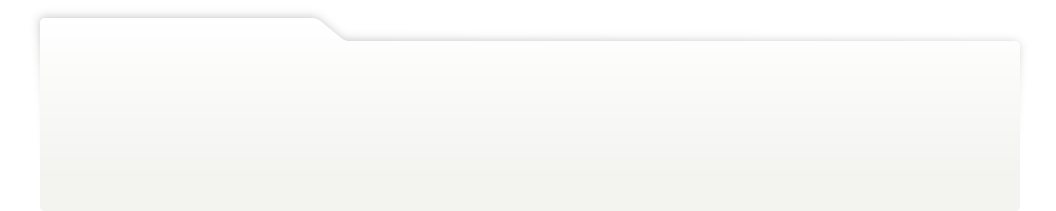
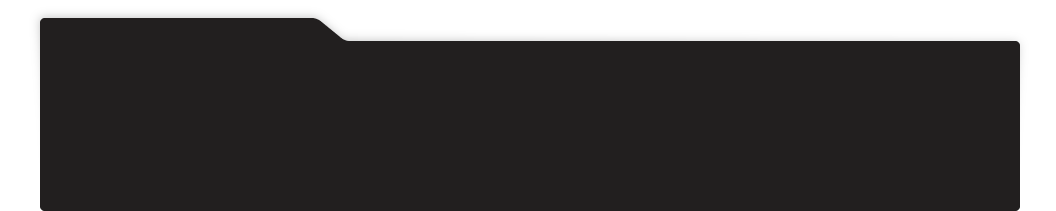
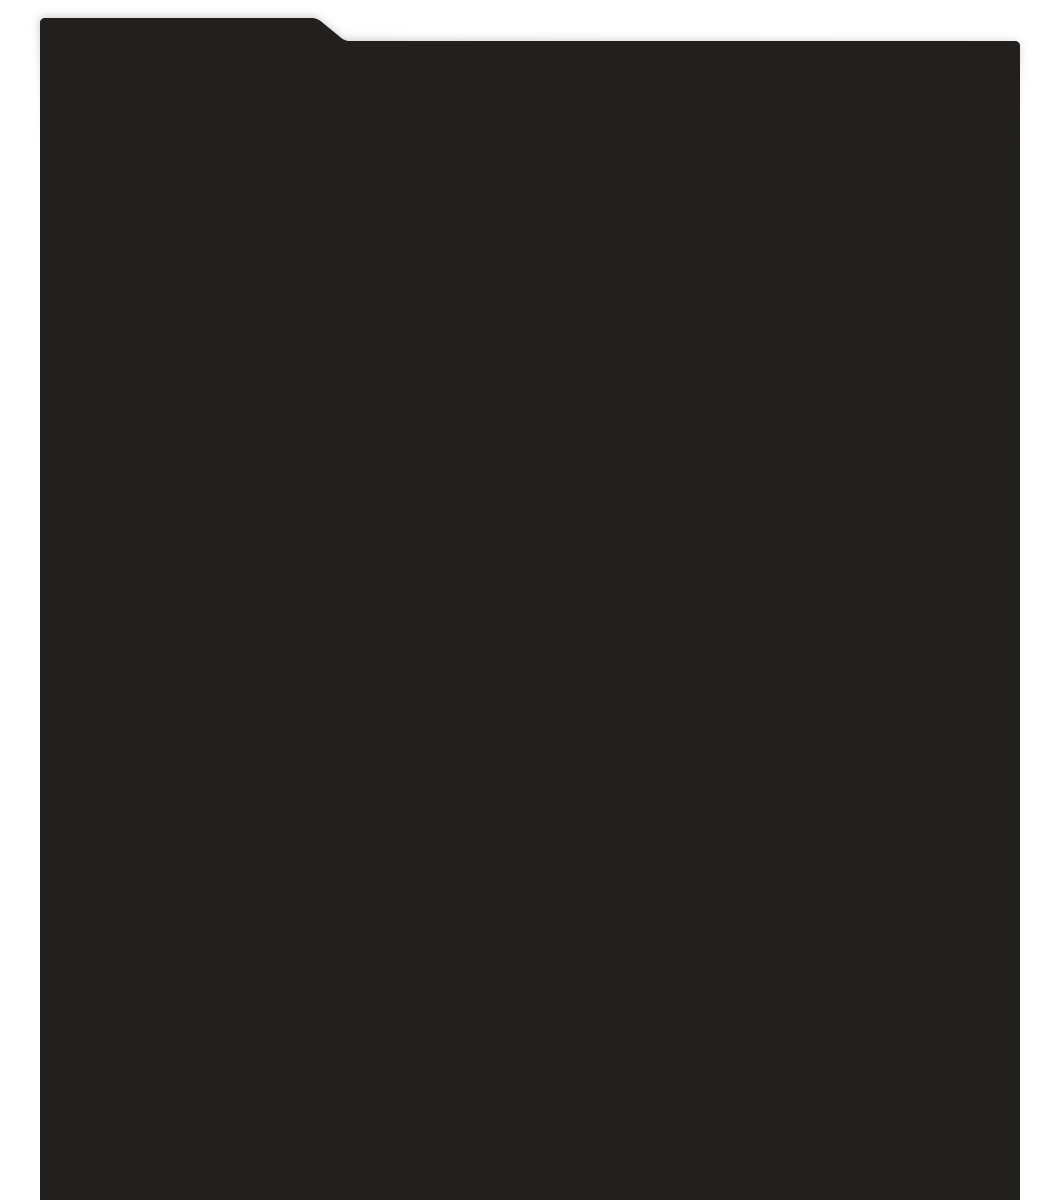
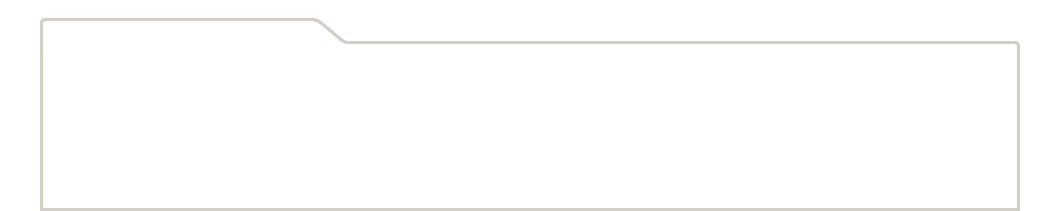
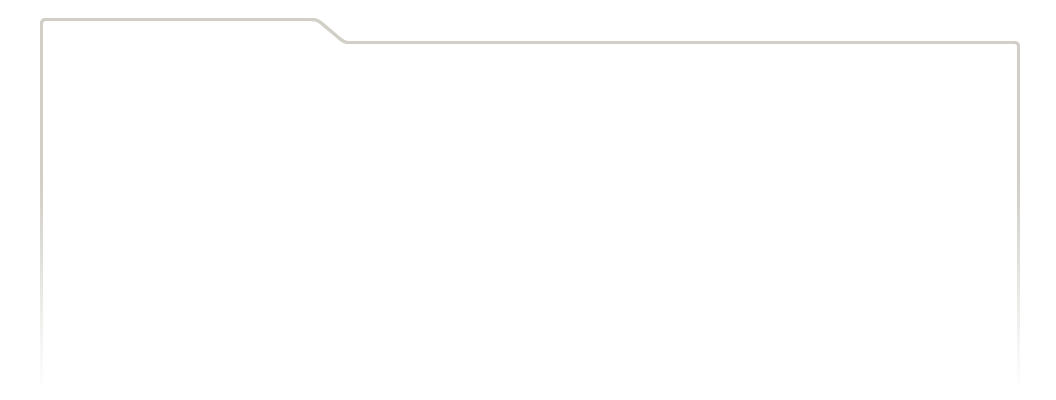
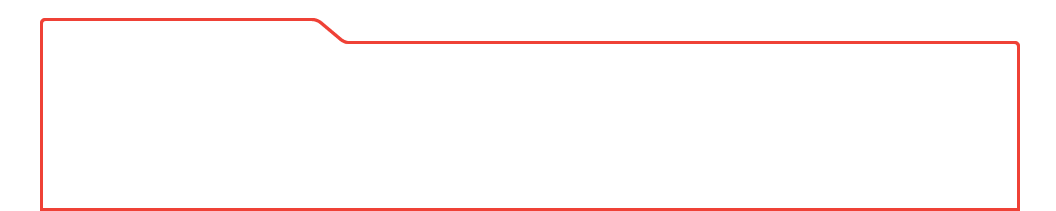
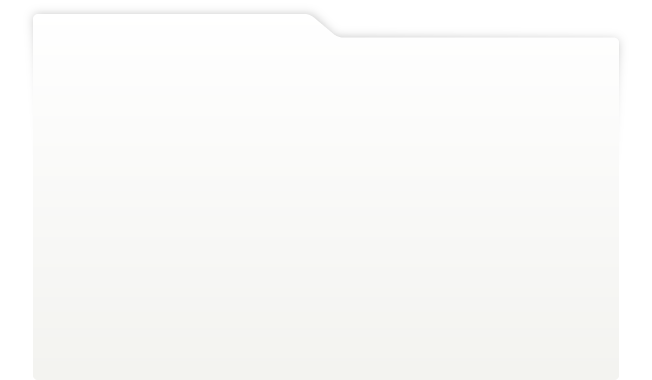
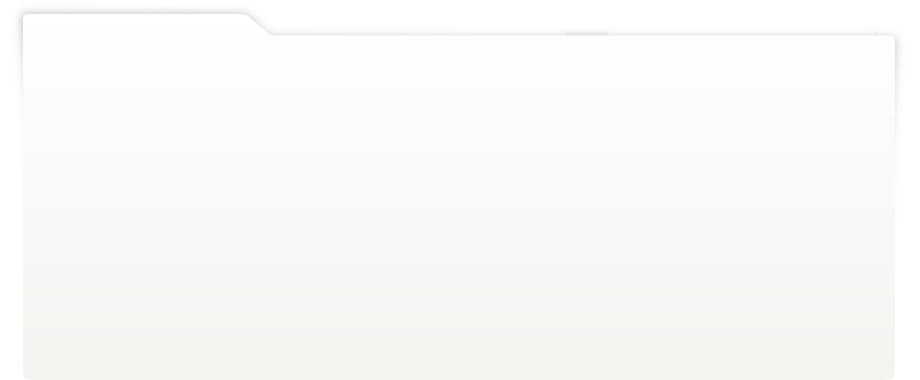
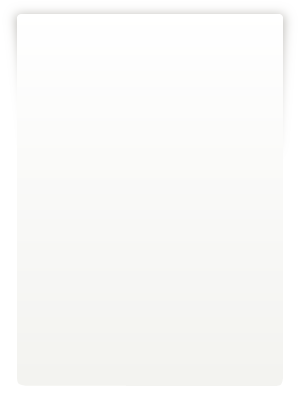
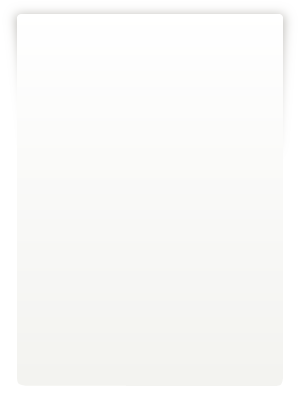
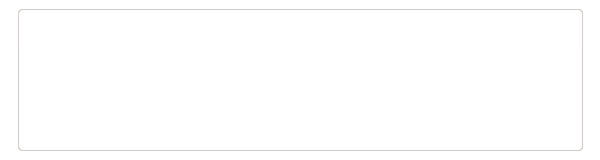
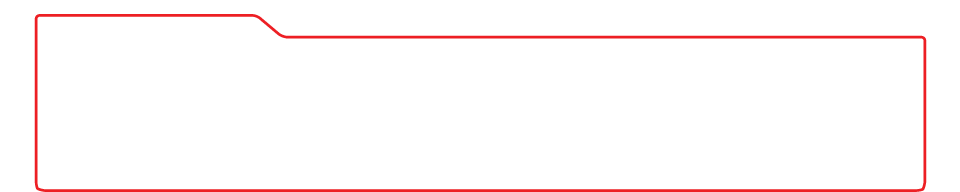
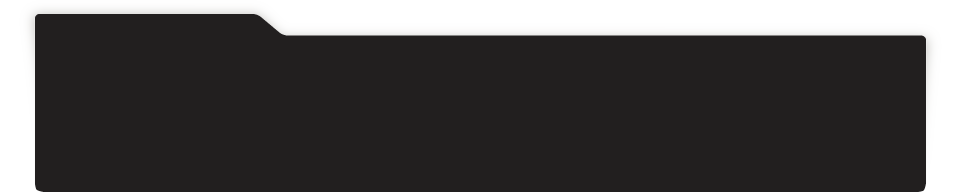
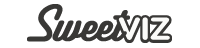
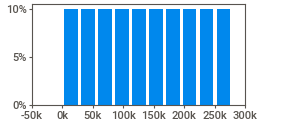
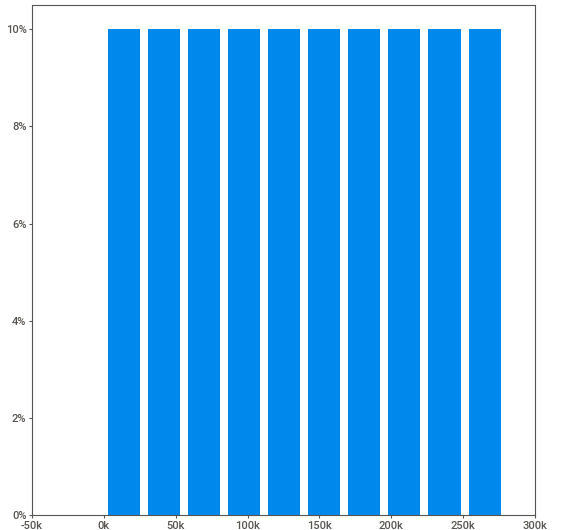
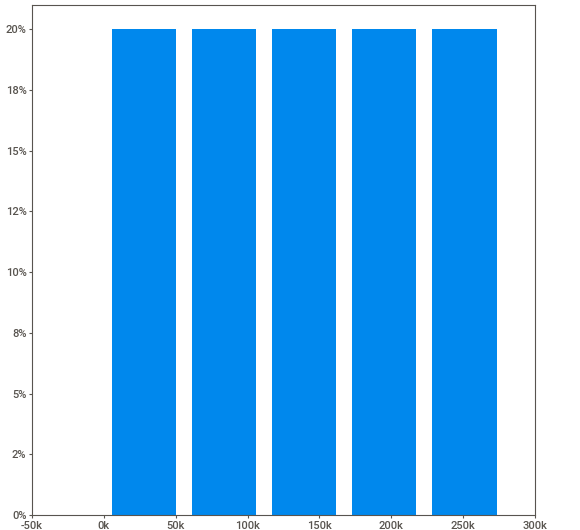
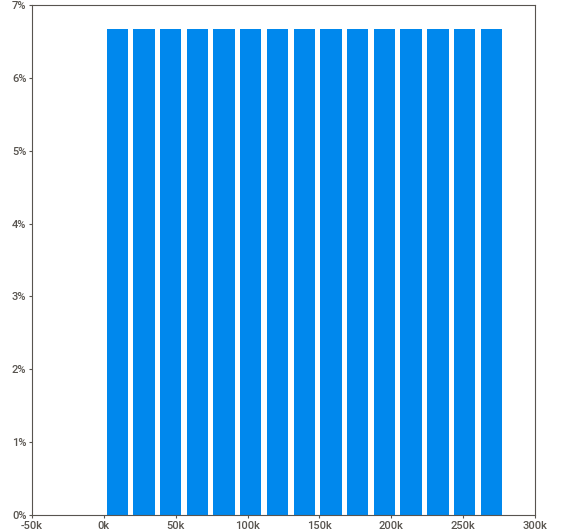
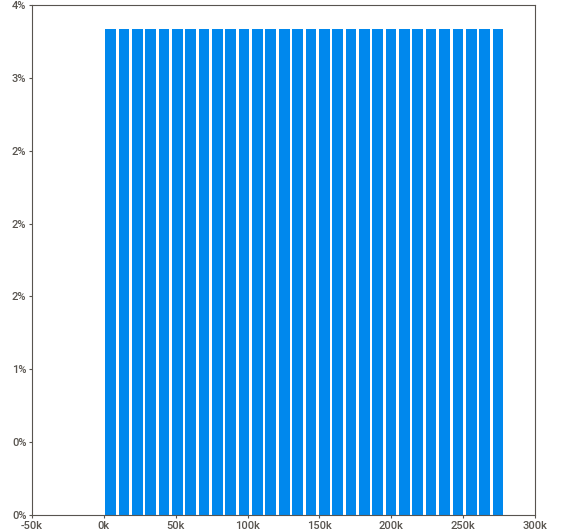
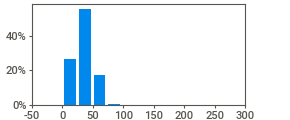
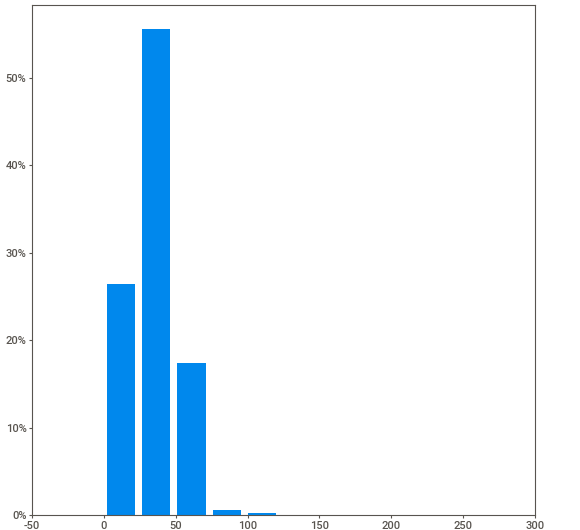
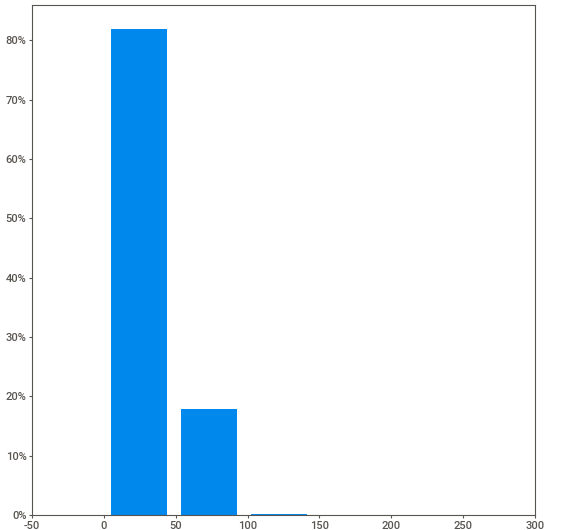
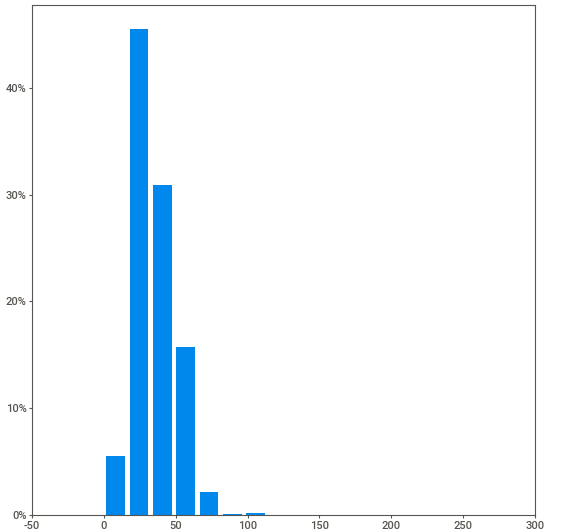
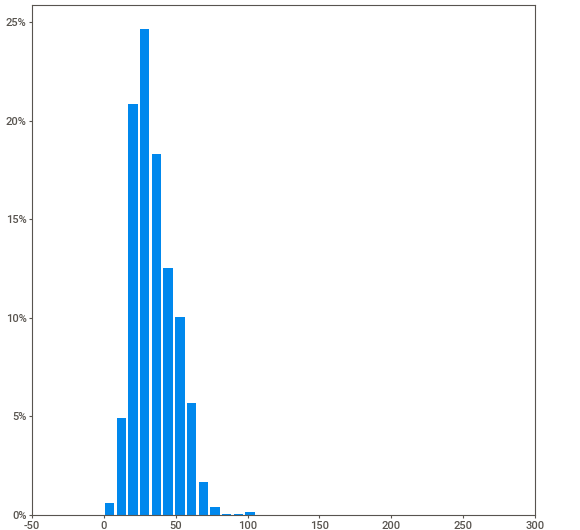
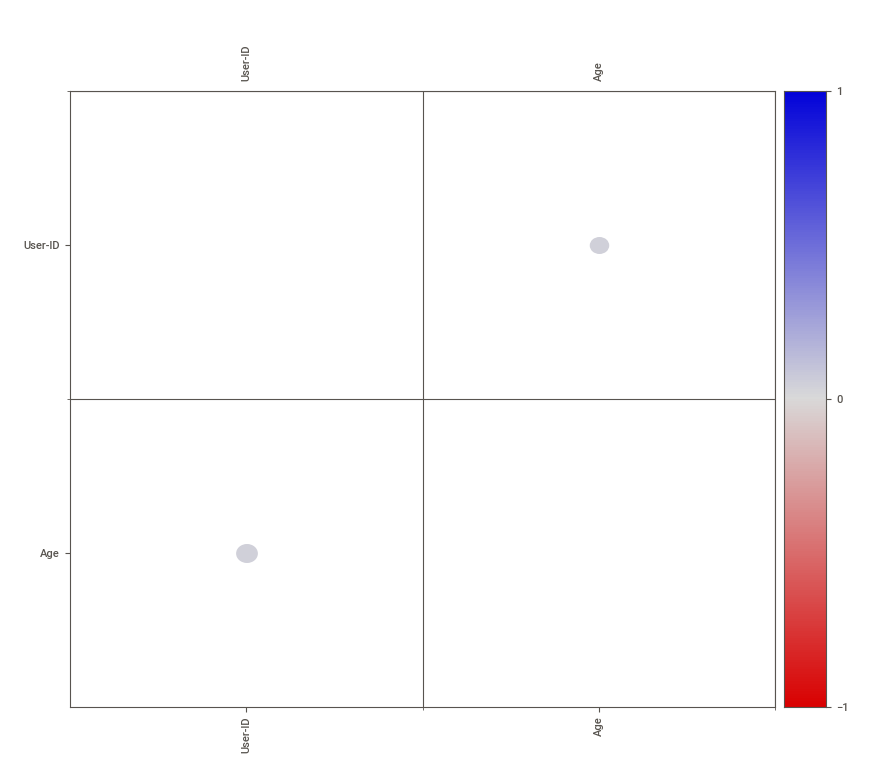
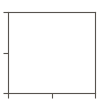

In [ ]:
#EDA User Dataset 
EDA_Report_Users = sv.analyze(Users)
EDA_Report_Users.show_html('EDA_Report_Users.html')
#showcasing the report 
EDA_Report_Users.show_notebook()

The EDA of Users data indicates that age has at 40% missing values, which is a rather large amount. Data cleaning to ensure usability is, therefore, necessary because the values cannot be dropped. Any data work involving age shall need to be reviewed to ensure that that one does not use information that may not be an accurate representation of the prevailing situation. 

In [ ]:
#EDA using Autoviz
autoviz = AutoViz_Class().AutoViz('/content/Books.csv')

    max_rows_analyzed is smaller than dataset shape 271360...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Removing ['Year-Of-Publication'] column(s) due to mixed data type detected...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
ISBN,10000,object,0,0.000000,100.000000,1,"combine rare categories, possible ID column: drop"
Image-URL-S,10000,object,0,0.000000,100.000000,1,"combine rare categories, possible ID column: drop"
Image-URL-M,10000,object,0,0.000000,100.000000,1,"combine rare categories, possible ID column: drop"
Image-URL-L,10000,object,0,0.000000,100.000000,1,"combine rare categories, possible ID column: drop"
Book-Title,9938,object,0,0.000000,99.380000,1,combine rare categories
Book-Author,8088,object,0,0.000000,80.880000,1,combine rare categories
Publisher,2542,object,0,0.000000,25.420000,1,combine rare categories
Year-Of-Publication,112,object,0,0.000000,1.120000,1,"combine rare categories, fix mixed data types"


    8 Predictors classified...
Cannot visualize this dataset since no numeric or integer vars in data...returning
Not able to read or load file. Please check your inputs and try again...


This EDA revealed that year of publication appeared to gave mixed datatypes. I noted the issue when attempting to use Sweetviz, so I opted for autoviz to give me ideas on what the issue could be. The best part about autoviz libraries is that they offer data cleaning improvement strategies, which, in this case, involves fixing the mixed data types.

***Combining The Datasets***
The recommendation system can rely on popularity or reviews. However, we see that the dataset, as it was, contained three different CSV files, Users, Ratings, and Books. We need to combine these excel file into one holistic dataset that we can analyze. 

At this point, the best aspect is to clean the data to ensure that it matches the requirements. The three data visualization steps confirmed several issues, with the following two being the biggest problems  

1.   Year of Publication had mixed datatypes 
2.   Age had significant missing values 

I shall only attempt to resolve this problem should I wish to recommend books based on age. 

Regardless, I need to combine several aspects to check for 


1.   Highest rated books 
2.   Popular books and authors











In [ ]:
#Merging data

Books.combo = Ratings.merge(Books, on= 'ISBN')

In [ ]:
#Confirming 
Books.combo.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
